#### Nama: Umbara Sakti Mihardja
#### Batch: September 2022

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
406954,406954,14549047,16611358,10000,10000,10000.0,60 months,16.59,246.33,D,D1,asst supervisor,10+ years,MORTGAGE,43000.0,Source Verified,Apr-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,146xx,NY,18.76,0.0,Feb-03,1.0,NaN,NaN,15.0,0.0,9512,62.6,20.0,w,7387.27,7387.27,5172.930000,5172.93,2612.73,2560.20,0.0,0.0,0.0,Jan-16,246.33,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,241.0,57476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15200.0,NaN,NaN,NaN
28031,28031,545552,703608,2500,2500,2500.0,36 months,14.72,86.33,C,C5,United States Army,6 years,MORTGAGE,60000.0,Not Verified,Jul-10,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/11/10 > I would like to...,debt_consolidation,Debt,220xx,VA,14.42,2.0,Oct-04,0.0,12.0,NaN,9.0,0.0,874,41.6,13.0,f,0.00,0.00,3106.600000,3106.60,2500.00,606.60,0.0,0.0,0.0,Jul-13,91.34,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207565,207565,1422332,1673080,6000,6000,6000.0,36 months,13.11,202.49,B,B4,Capital One Bank,1 year,OWN,100000.0,Not Verified,Aug-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/15/12 > Loan is to cons...,debt_consolidation,Pay All,112xx,NY,9.73,0.0,Nov-03,1.0,32.0,NaN,19.0,0.0,11281,21.9,23.0,f,0.00,0.00,7286.225595,7286.23,6000.00,1286.23,0.0,0.0,0.0,Aug-15,210.96,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110139,110139,6525086,8077220,30000,30000,29950.0,36 months,10.64,977.06,B,B2,Calypso Technology,7 years,MORTGAGE,235000.0,Verified,Aug-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/21/13 > Debt Consolidat...,debt_consolidation,Debt Consolidation,101xx,NY,12.88,1.0,Apr-99,0.0,17.0,NaN,10.0,0.0,31386,44.1,26.0,f,6603.45,6592.41,28334.080000,28286.91,23396.55,4937.53,0.0,0.0,0.0,Jan-16,977.06,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,1006440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71118.0,NaN,NaN,NaN
237074,237074,36491010,39222795,16800,16800,16800.0,60 months,12.99,382.17,C,C2,Nurse,2 years,MORTGAGE,56000.0,Source Verified,Dec-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,402xx,KY,32.55,0.0,Aug-98,0.0,77.0,NaN,17.0,0.0,20979,78.9,33.0,w,14019.94,14019.94,4956.090000,4956.09,2780.06,2176.03,0.0,0.0,0.0,Jan-16,382.17,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,163.0,58614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26600.0,NaN,NaN,NaN


In [3]:
#replace to datetime type
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

In [4]:
df['payment_day'] = df['last_pymnt_d'] - df['issue_d']
df['payment_day'] = df['payment_day'].astype('timedelta64[D]')

In [5]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,payment_day
57742,57742,8959184,10751099,20000,20000,20000.0,36 months,7.90,625.81,A,A4,Manager,3 years,RENT,47000.0,Verified,2013-11-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/22/13 > Hi. I'm current...,major_purchase,Major purchase,112xx,NY,3.43,0.0,Sep-98,2.0,NaN,NaN,7.0,0.0,3587,15.7,18.0,f,0.00,0.00,22276.27000,22276.27,20000.00,2276.27,0.00,0.0,0.0,2016-01-01,7256.83,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,20587.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22800.0,NaN,NaN,NaN,791.0
274143,274143,31808149,34421335,25000,25000,25000.0,60 months,14.99,594.62,C,C5,Maintenance supervise,10+ years,OWN,68481.0,Source Verified,2014-10-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,700xx,LA,33.84,0.0,Jun-07,0.0,NaN,NaN,12.0,0.0,20522,67.7,20.0,w,20709.87,20709.87,8303.86000,8303.86,4290.13,4013.73,0.00,0.0,0.0,2015-12-01,594.62,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30300.0,NaN,NaN,NaN,426.0
49309,49309,9785493,11637550,6650,6650,6650.0,36 months,7.90,208.09,A,A4,Marketing Director,4 years,MORTGAGE,115999.0,Not Verified,2013-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/12/13 > I bought new ha...,credit_card,Floors,430xx,OH,20.43,0.0,Aug-90,0.0,28.0,NaN,7.0,0.0,17776,75.3,19.0,f,2201.41,2201.41,5201.39000,5201.39,4448.59,752.80,0.00,0.0,0.0,2016-01-01,208.09,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,232929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23600.0,NaN,NaN,NaN,761.0
330904,330904,24053328,26426287,13000,13000,13000.0,60 months,19.52,340.96,E,E2,Collections Consultant,10+ years,OWN,45000.0,Source Verified,2014-08-01,Late (31-120 days),n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,109xx,NY,32.37,0.0,Aug-99,2.0,36.0,105.0,14.0,1.0,22425,78.7,21.0,w,10982.36,10982.36,4773.44000,4773.44,2017.64,2755.80,0.00,0.0,0.0,2015-10-01,340.96,Feb-16,Jan-16,0.0,36.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,54500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,NaN,NaN,NaN,426.0
211522,211522,1366624,1610779,12825,12825,12825.0,36 months,6.03,390.34,A,A1,Bay City Electric Works,3 years,MORTGAGE,42000.0,Not Verified,2012-07-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 06/18/12 > We need to do a...,home_improvement,Pool Renovation,920xx,CA,0.97,0.0,Jun-06,0.0,NaN,NaN,10.0,0.0,2767,5.1,16.0,f,0.00,0.00,14074.48268,14074.48,12825.00,1229.96,19.52,0.0,0.0,2015-08-01,4.62,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1126.0


In [6]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [7]:
#check duplicated data
df.duplicated().sum()

0

In [8]:
#null value
print(df.isnull().sum())
print(df.shape)

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [9]:
#data target value
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
#drop unused coloumn
df = df.drop(['Unnamed: 0', 'member_id', 'url', 'desc', 'zip_code', 'emp_title',
              'mths_since_last_record', 'mths_since_last_major_derog', 
              'annual_inc_joint', 'dti_joint', 'verification_status_joint',
              'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 
              'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
             'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
             'inq_last_12m', 'next_pymnt_d', 'collections_12_mths_ex_med', 
              'collection_recovery_fee', 'collections_12_mths_ex_med',
             'next_pymnt_d', 'recoveries', 'sub_grade', 'title', 'policy_code',
             'funded_amnt_inv', 'earliest_cr_line', 'last_credit_pull_d', 'installment',
              'last_pymnt_d', 'issue_d', 'addr_state', 'pymnt_plan', 'total_pymnt_inv',
              'dti', 'application_type'
             ], axis = 1)

In [11]:
df.sample(5)

,id,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_day
95275,7085202,5500,5500,36 months,10.64,B,NaN,RENT,19000.0,Verified,Current,debt_consolidation,0.0,0.0,NaN,6.0,1.0,10870,46.9,10.0,f,1378.68,1378.68,5013.89000,4121.32,892.57,0.0,179.13,0.0,50.0,10870.0,23200.0,852.0
332259,23493187,10000,10000,36 months,13.98,C,2 years,RENT,58000.0,Source Verified,Fully Paid,debt_consolidation,0.0,4.0,32.0,12.0,0.0,6171,43.8,23.0,w,0.00,0.00,10450.13731,10000.00,450.14,0.0,9425.10,0.0,0.0,26749.0,14100.0,122.0
269914,32279111,5500,5500,36 months,20.20,E,NaN,OWN,15360.0,Verified,Current,debt_consolidation,0.0,0.0,NaN,5.0,0.0,7144,96.5,7.0,w,3742.28,3742.28,2854.15000,1757.72,1096.43,0.0,204.97,0.0,80.0,7144.0,7400.0,426.0
78267,7730523,27000,27000,60 months,25.57,F,10+ years,MORTGAGE,70000.0,Verified,Fully Paid,debt_consolidation,0.0,1.0,NaN,12.0,1.0,12836,62.0,30.0,f,0.00,0.00,36046.81384,27000.00,9046.81,0.0,23226.13,0.0,0.0,42469.0,20700.0,516.0
112631,6115139,9500,9500,36 months,7.62,A,5 years,MORTGAGE,83000.0,Source Verified,Fully Paid,home_improvement,0.0,0.0,NaN,5.0,1.0,1,0.0,10.0,f,0.00,0.00,10451.10054,9500.00,951.10,0.0,4539.72,0.0,0.0,192241.0,8200.0,669.0


In [12]:
df.shape

(466285, 33)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      466285 non-null  int64  
 1   loan_amnt               466285 non-null  int64  
 2   funded_amnt             466285 non-null  int64  
 3   term                    466285 non-null  object 
 4   int_rate                466285 non-null  float64
 5   grade                   466285 non-null  object 
 6   emp_length              445277 non-null  object 
 7   home_ownership          466285 non-null  object 
 8   annual_inc              466281 non-null  float64
 9   verification_status     466285 non-null  object 
 10  loan_status             466285 non-null  object 
 11  purpose                 466285 non-null  object 
 12  delinq_2yrs             466256 non-null  float64
 13  inq_last_6mths          466256 non-null  float64
 14  mths_since_last_deli

In [14]:
#fill null value in emp_length with < 1 year
df['emp_length'] = df['emp_length'].fillna('< 1 year')

In [15]:
#fill null data with 0 (integer / float data type)
df = df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      466285 non-null  int64  
 1   loan_amnt               466285 non-null  int64  
 2   funded_amnt             466285 non-null  int64  
 3   term                    466285 non-null  object 
 4   int_rate                466285 non-null  float64
 5   grade                   466285 non-null  object 
 6   emp_length              466285 non-null  object 
 7   home_ownership          466285 non-null  object 
 8   annual_inc              466285 non-null  float64
 9   verification_status     466285 non-null  object 
 10  loan_status             466285 non-null  object 
 11  purpose                 466285 non-null  object 
 12  delinq_2yrs             466285 non-null  float64
 13  inq_last_6mths          466285 non-null  float64
 14  mths_since_last_deli

In [17]:
#numerical and categorical data
cat = ['term', 'grade', 'emp_length', 'home_ownership',
      'verification_status','purpose', 'initial_list_status',
       ]

num = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc',
      'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq','open_acc', 'pub_rec', 
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
      'total_rec_prncp', 'total_rec_late_fee','last_pymnt_amnt', 
       'acc_now_delinq','tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'payment_day' ]

In [18]:
df[num].describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_day
count,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05,466285.000000
mean,14317.277577,14291.801044,13.829236,7.327675e+04,0.284661,0.804695,15.793573,11.186373,0.160554,1.623020e+04,56.135985,25.062871,4410.062342,4408.452258,8866.014657,0.650129,3123.913796,0.004002,1.629893e+02,1.178823e+05,2.580051e+04,606.912946
std,8286.509164,8274.371300,4.357587,5.496375e+04,0.797343,1.091583,22.557500,4.988151,0.510848,2.067625e+04,23.772387,11.601464,6355.078769,6353.198001,7031.687997,5.265730,5554.737393,0.068635,1.348289e+04,1.487196e+05,3.600534e+04,290.834461
min,500.000000,500.000000,5.420000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,10.990000,4.500000e+04,0.000000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,3708.560000,0.000000,312.620000,0.000000,0.000000e+00,1.546700e+04,8.900000e+03,426.000000
50%,12000.000000,12000.000000,13.660000,6.300000e+04,0.000000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.500000,23.000000,441.470000,441.380000,6817.760000,0.000000,545.960000,0.000000,0.000000e+00,5.247900e+04,1.920000e+04,549.000000
75%,20000.000000,20000.000000,16.490000,8.895300e+04,0.000000,1.000000,28.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,12000.000000,0.000000,3187.510000,0.000000,0.000000e+00,1.849300e+05,3.430000e+04,791.000000
max,35000.000000,35000.000000,26.060000,7.500000e+06,29.000000,33.000000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,35000.030000,358.680000,36234.440000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,2130.000000


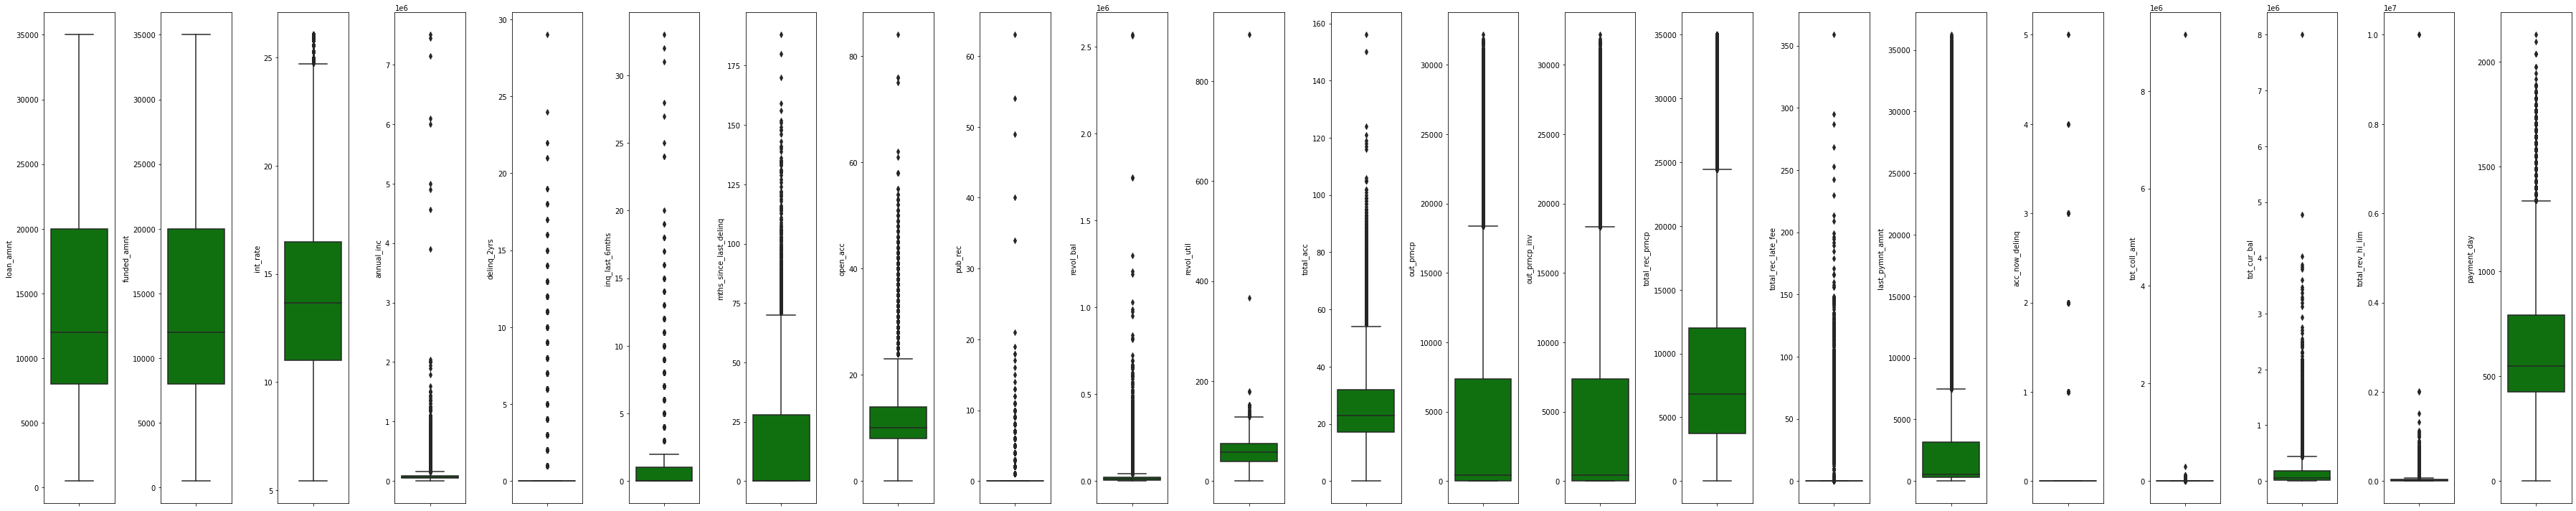

In [19]:
plt.figure(figsize = (50,10))
fitur = num
for i in range (0, len(fitur)):
    plt.subplot(1,len(fitur), i+1)
    sns.boxplot(y=df[fitur[i]], color = 'green', orient = 'v')
    plt.tight_layout()

In [20]:
df[cat].describe()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status
count,466285,466285,466285,466285,466285,466285,466285
unique,2,7,11,6,3,14,2
top,36 months,B,10+ years,MORTGAGE,Verified,debt_consolidation,f
freq,337953,136929,150049,235875,168055,274195,303005


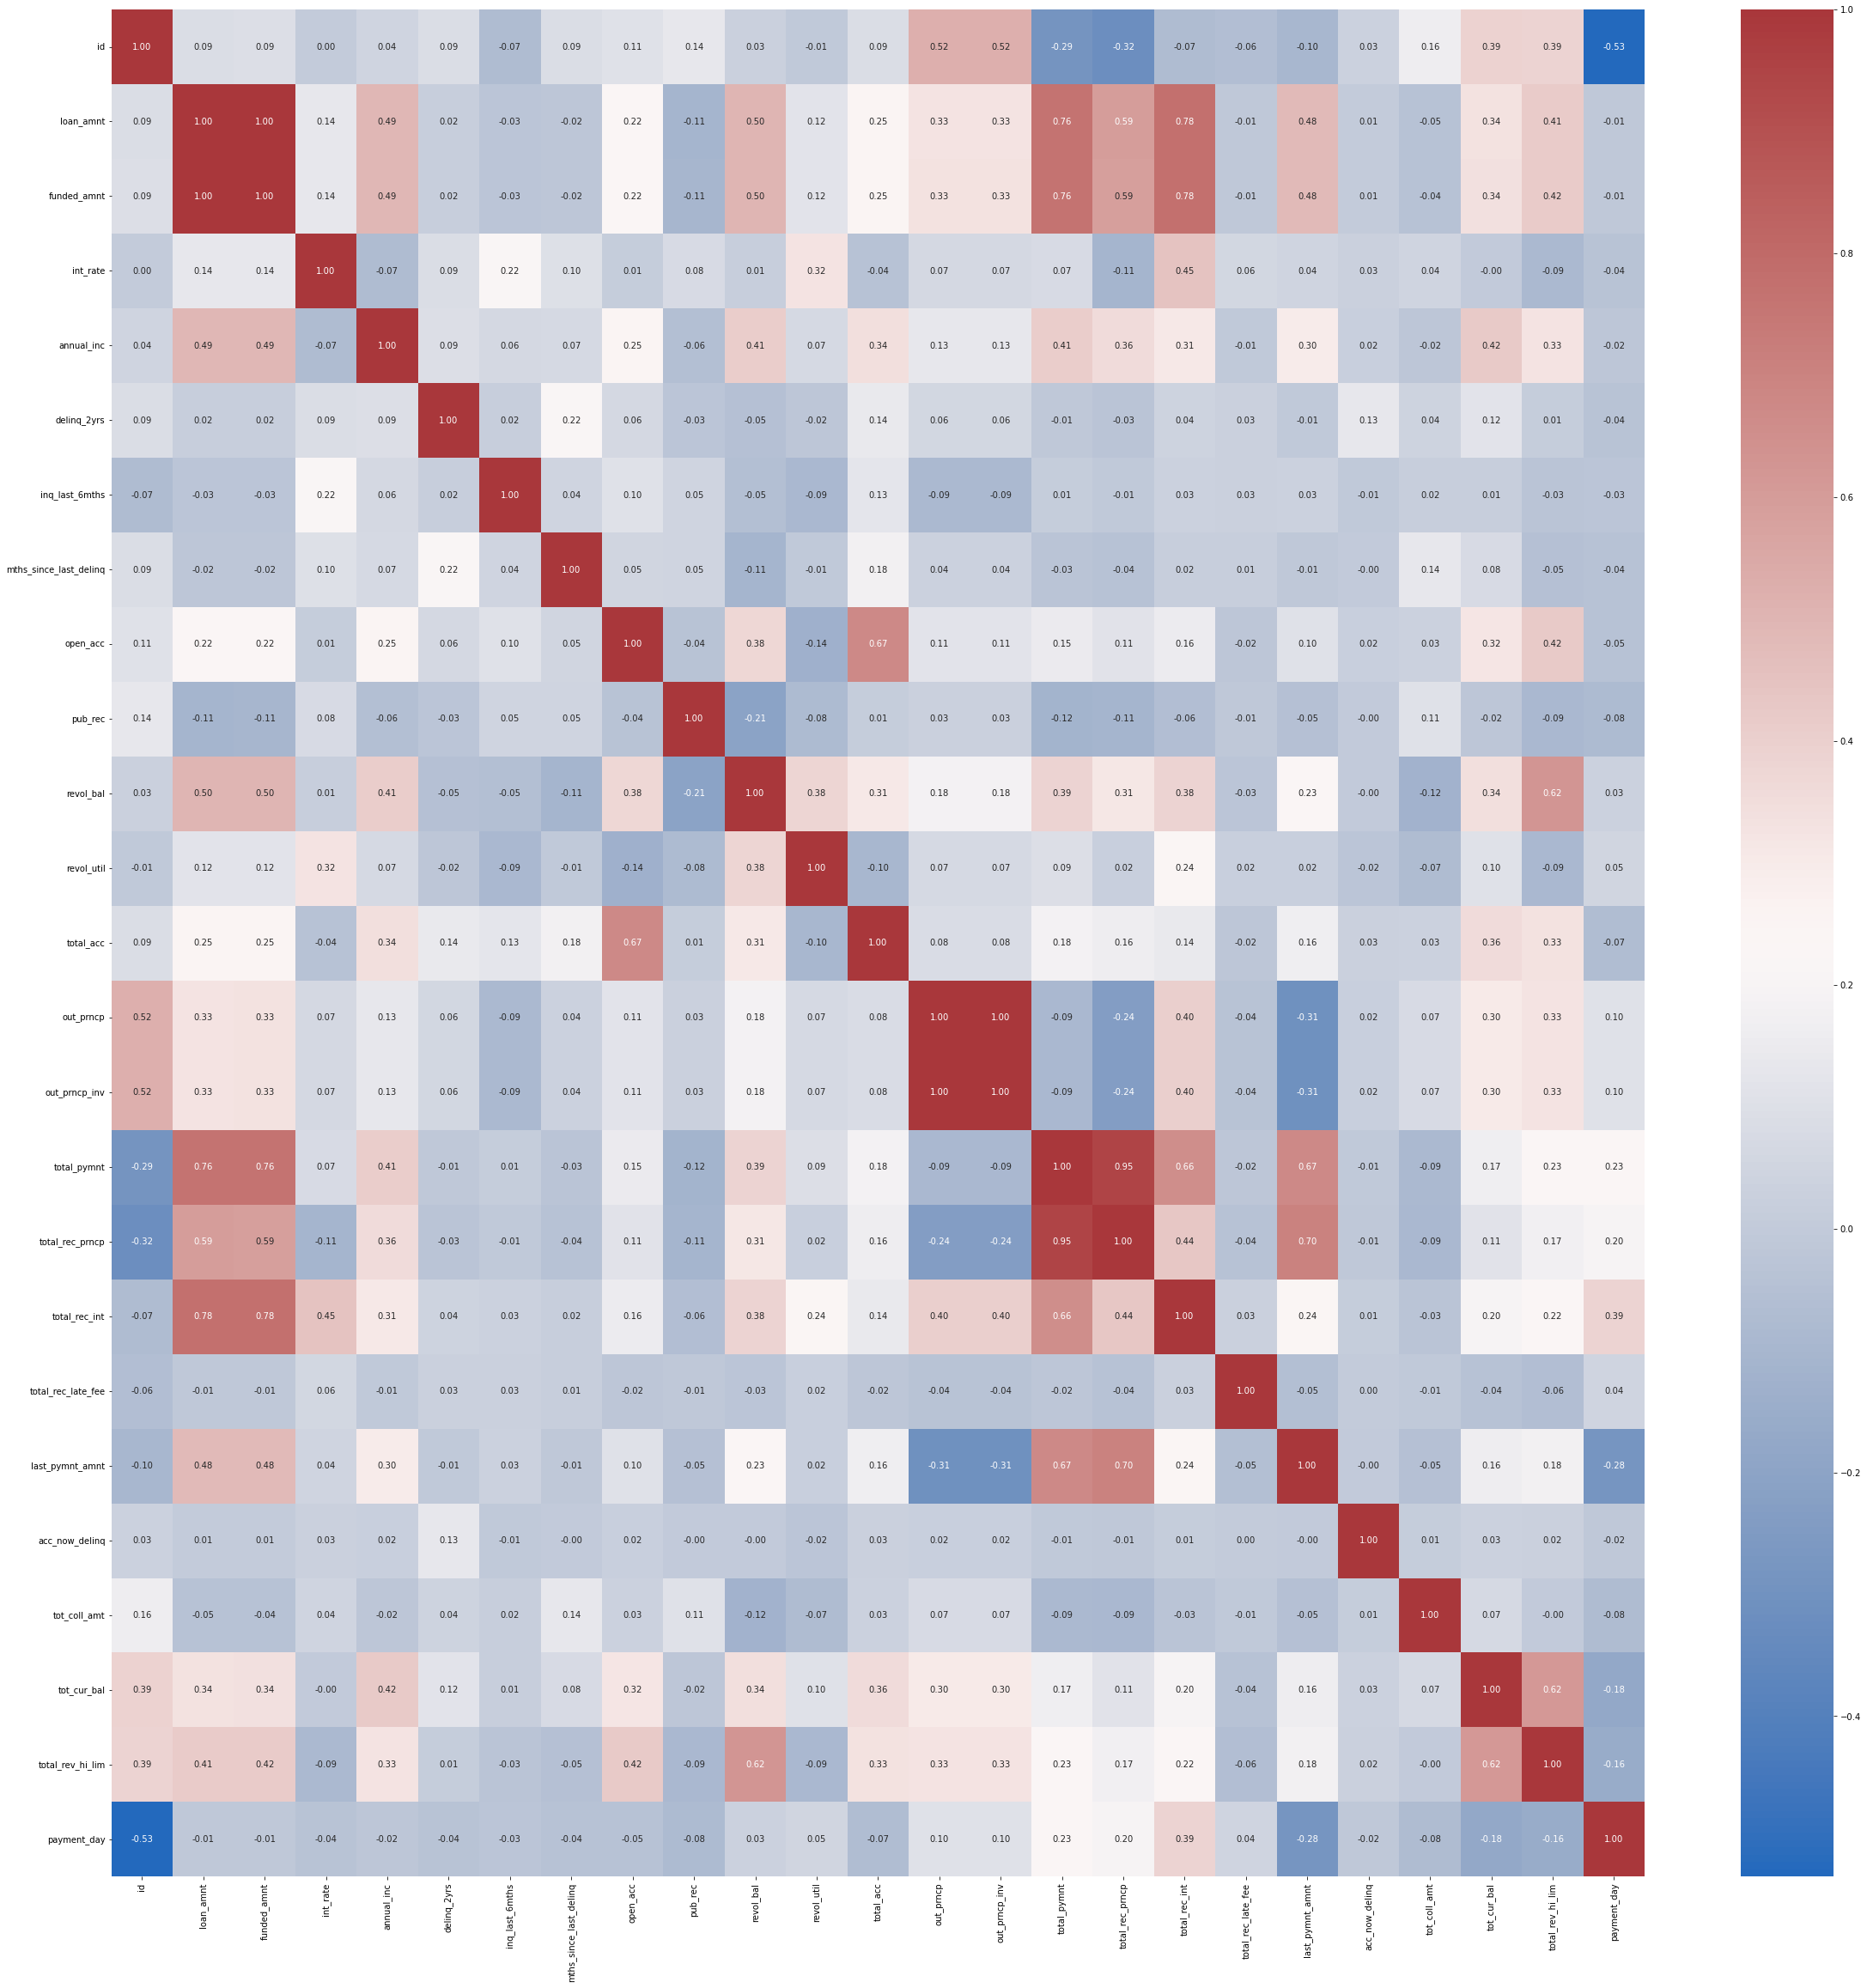

In [21]:
#found correlation
plt.figure(figsize = (40,40),dpi=72)
sns.heatmap(df.corr(method='spearman'), cmap = 'vlag', annot = True, fmt='.2f');

## EXPLORATORY DATA ANALYSIS AND BUSINESS INSIGHT

In [22]:
df.sample(5)

,id,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_day
128405,5716694,15000,15000,60 months,14.33,C,8 years,RENT,63000.0,Verified,Current,credit_card,0.0,1.0,0.0,8.0,0.0,15392,57.9,14.0,f,8823.71,8808.98,10543.44000,6176.29,4367.15,0.0,351.60,0.0,0.0,16797.0,26602.0,913.0
202390,1457716,15250,15250,36 months,11.14,B,8 years,MORTGAGE,232000.0,Source Verified,Fully Paid,small_business,0.0,0.0,65.0,7.0,0.0,7486,33.1,12.0,f,0.00,0.00,17606.13756,15250.00,2356.14,0.0,6600.48,0.0,0.0,0.0,0.0,730.0
87524,7446333,18000,18000,36 months,13.67,B,10+ years,OWN,69000.0,Verified,Current,debt_consolidation,0.0,1.0,74.0,16.0,0.0,12004,38.7,27.0,f,5209.62,5209.62,16532.49000,12790.38,3742.11,0.0,612.32,0.0,0.0,37115.0,30996.0,821.0
146336,4280179,8000,8000,36 months,18.49,D,4 years,RENT,58000.0,Verified,Fully Paid,debt_consolidation,0.0,0.0,0.0,6.0,3.0,4751,66.0,8.0,w,0.00,0.00,8699.99000,8000.00,699.99,0.0,7244.04,0.0,0.0,16923.0,7200.0,183.0
173603,3057651,35000,35000,36 months,18.75,D,6 years,RENT,110000.0,Verified,Fully Paid,small_business,1.0,2.0,7.0,5.0,0.0,8330,21.1,15.0,f,0.00,0.00,36606.12000,35000.00,1606.12,0.0,34049.34,0.0,0.0,29657.0,39424.0,89.0


<AxesSubplot:xlabel='loan_status', ylabel='count'>

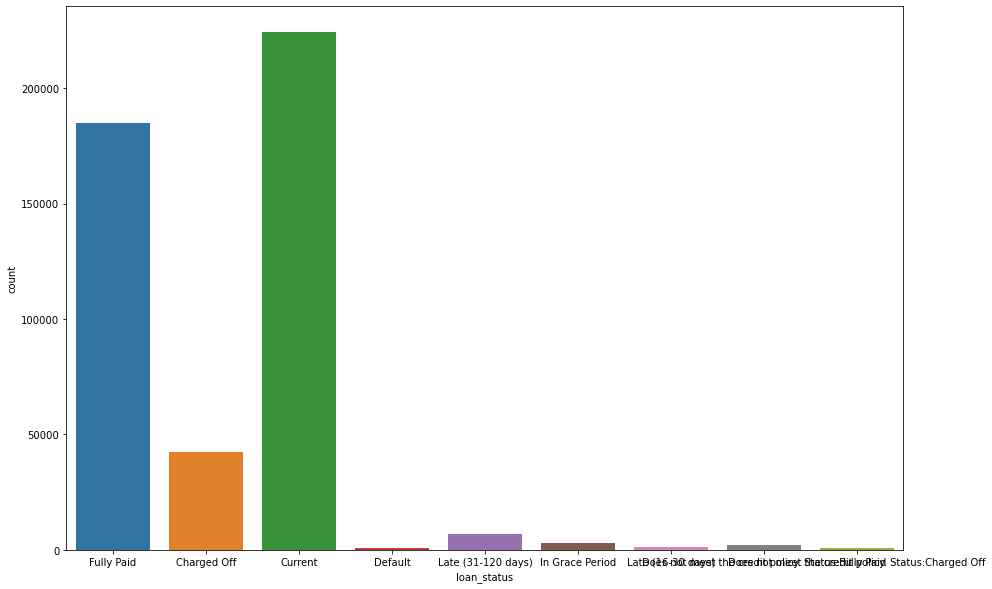

In [23]:
#loan status composition
plt.figure(figsize=(15,10),dpi=72)
sns.countplot(data=df, x=df['loan_status'])

In [24]:
loan_status_count = df[['id','loan_status']].groupby(['loan_status']).size().reset_index(name = 'count')
total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans)*100).astype('float')

print(loan_status_count)

                                         loan_status   count  percentage(%)
0                                        Charged Off   42475       9.109236
1                                            Current  224226      48.087757
2                                            Default     832       0.178432
3  Does not meet the credit policy. Status:Charge...     761       0.163205
4  Does not meet the credit policy. Status:Fully ...    1988       0.426349
5                                         Fully Paid  184739      39.619332
6                                    In Grace Period    3146       0.674695
7                                  Late (16-30 days)    1218       0.261214
8                                 Late (31-120 days)    6900       1.479782


In [25]:
#getting the dataframe of specific loan_status
charged_off = df.loc[df['loan_status'] == 'Charged Off']
default = df.loc[df['loan_status'] == 'Default']
nopol_charged_off = df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']
fully_paid = df.loc[df['loan_status'] == 'Fully Paid']
current = df.loc[df['loan_status'] == 'Current']

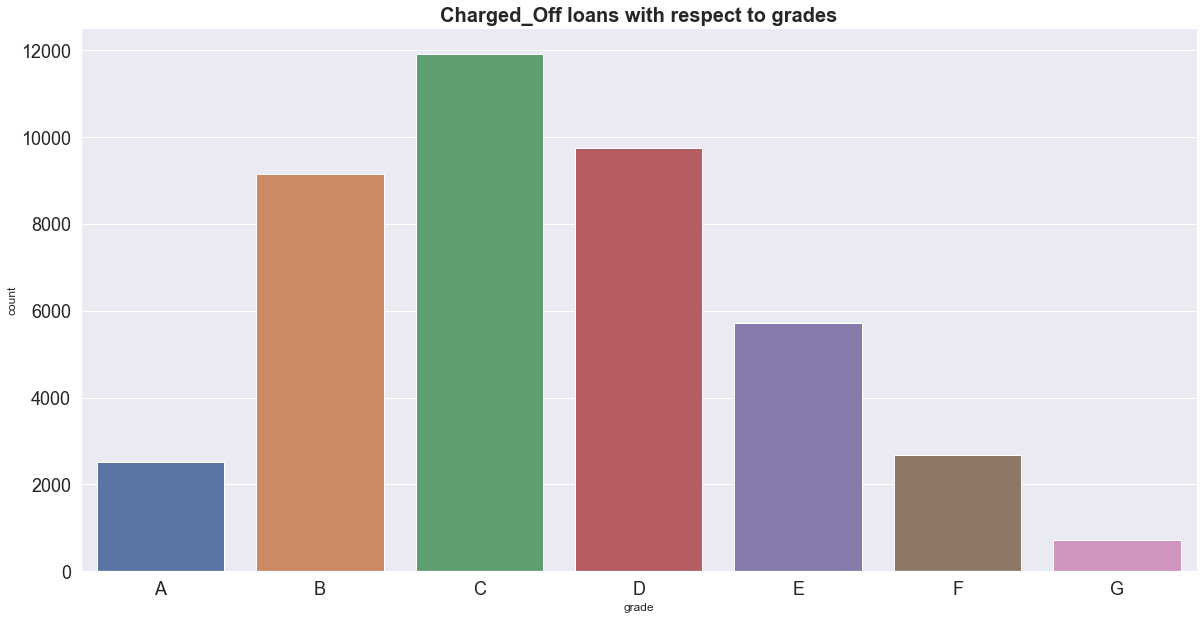

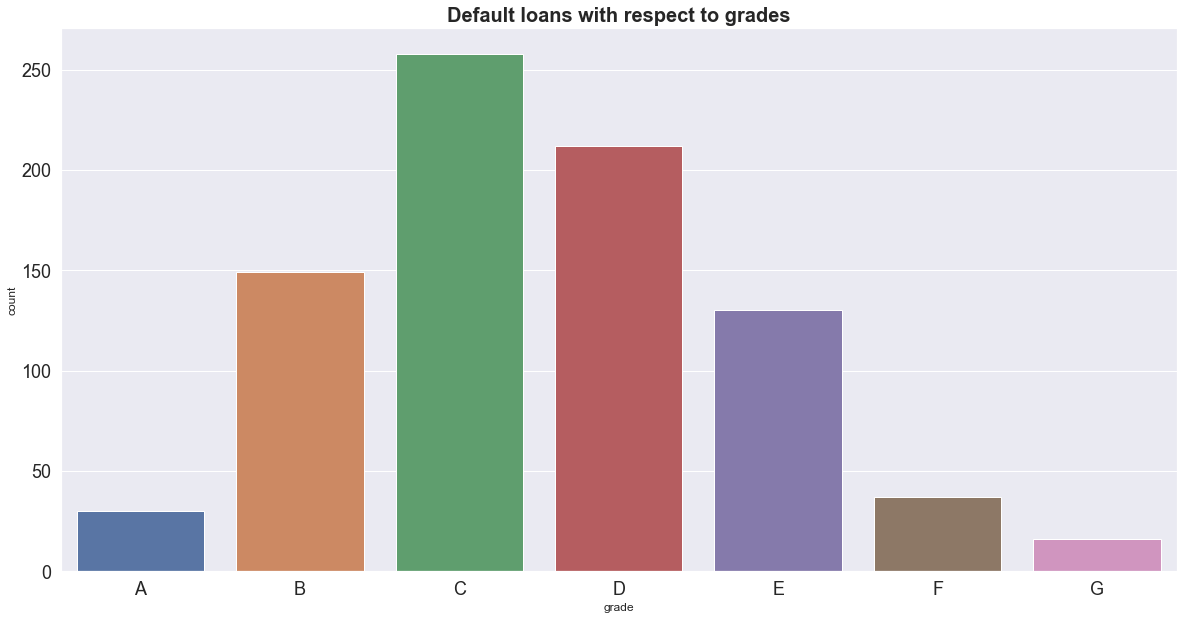

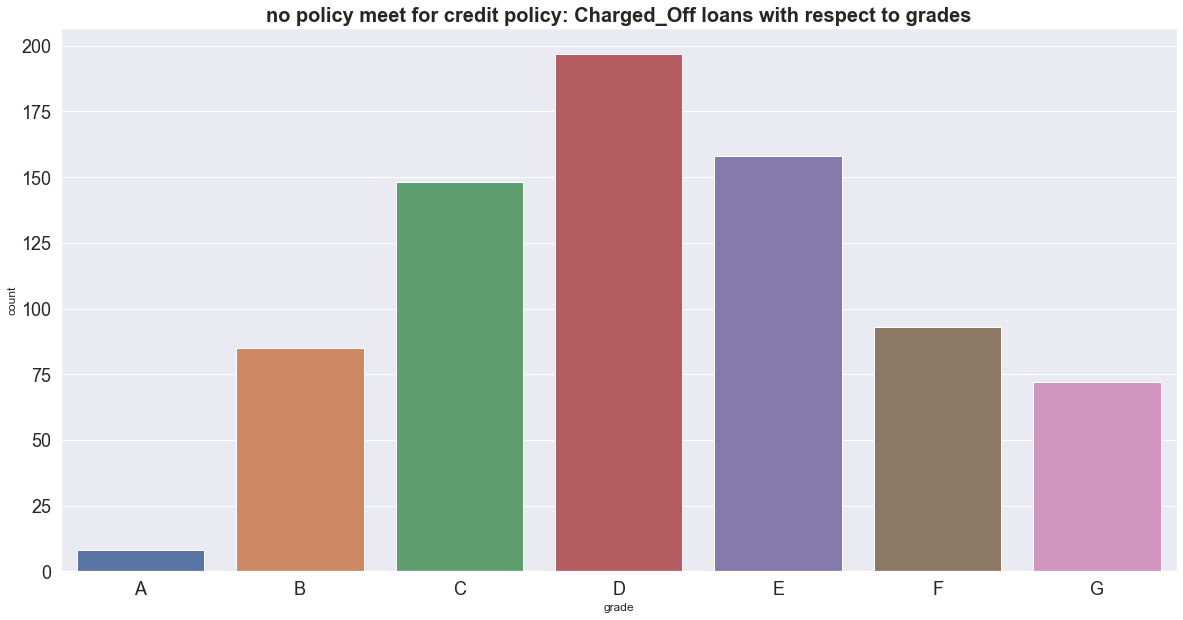

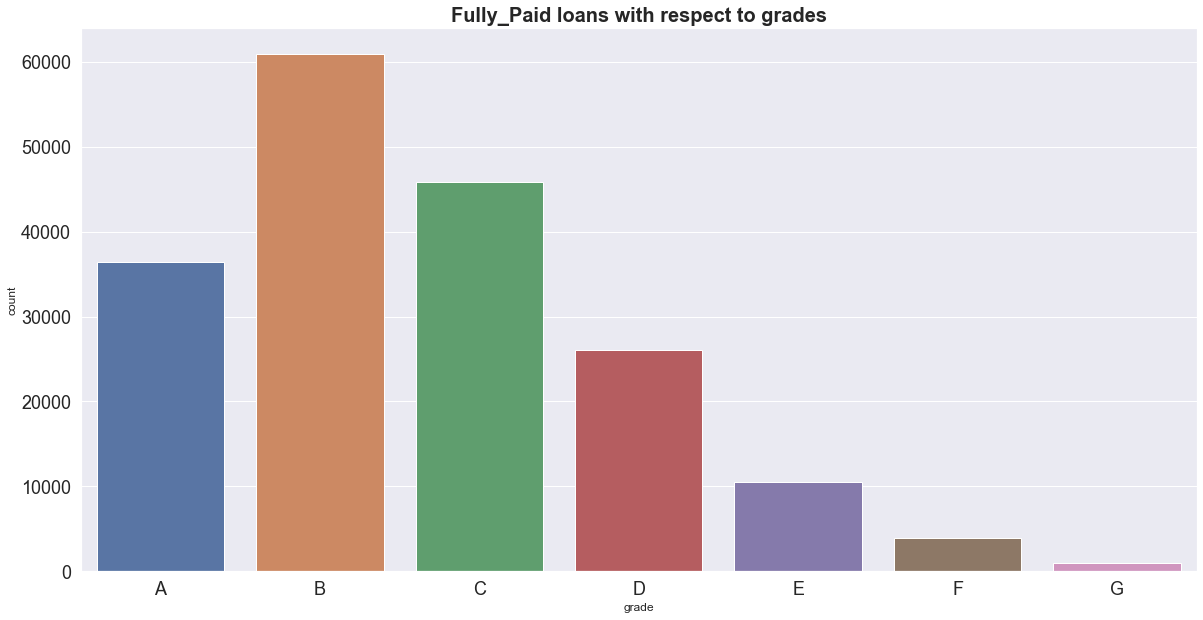

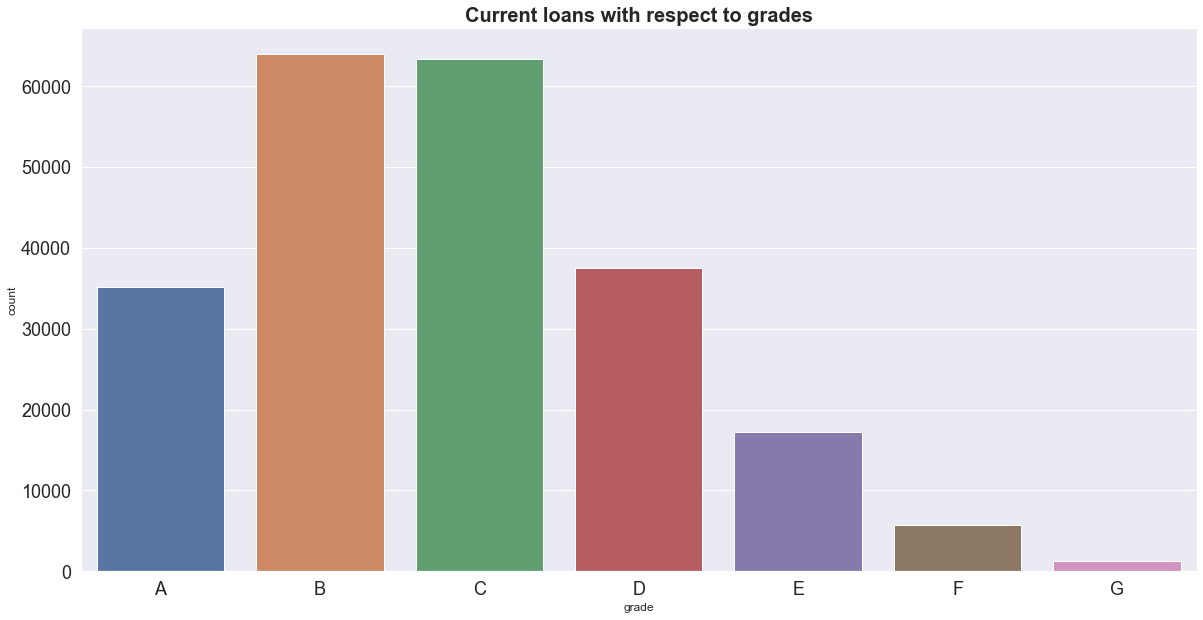

In [26]:
sns.set(rc ={'figure.figsize':(20,10)})
def loan_grade(data, name):
    data_grade = data.groupby(['grade']).size().reset_index(name='count')
    data_grade['percentage_(%)'] = (data_grade['count']/len(data))*100

    sns.barplot(x = 'grade', y = 'count', data = data_grade)
    plt.title('{} loans with respect to grades'.format(name), fontsize = 20, fontweight = 'bold')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

loan_grade(charged_off, 'Charged_Off')
loan_grade(default, 'Default')
loan_grade(nopol_charged_off, 'no policy meet for credit policy: Charged_Off')
loan_grade(fully_paid, 'Fully_Paid')
loan_grade(current, 'Current')

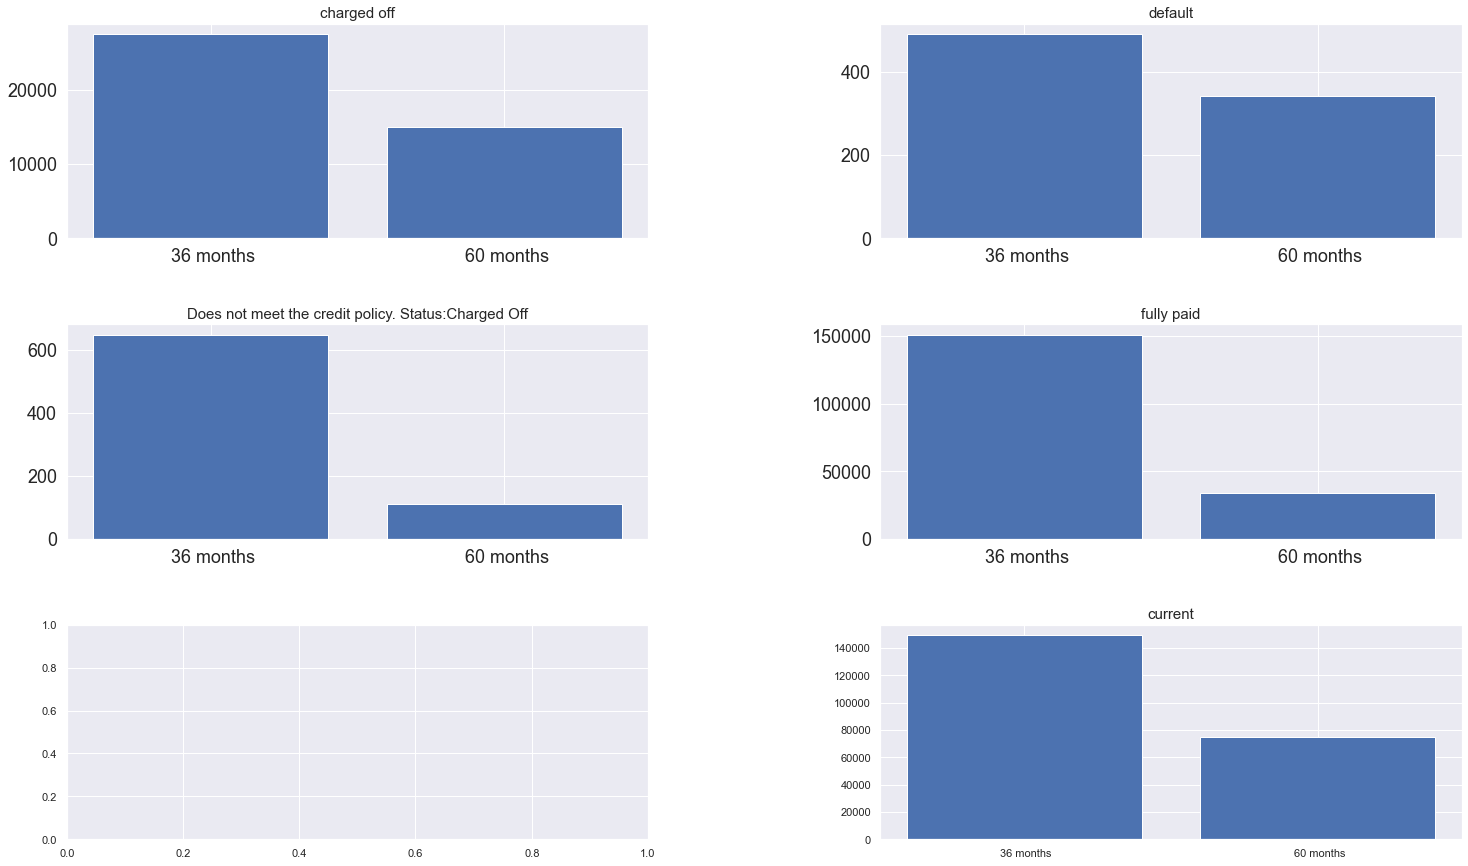

In [27]:
terms1 = charged_off.groupby(['term']).size().reset_index(name='count')
terms2 = default.groupby(['term']).size().reset_index(name='count')
terms3 = nopol_charged_off.groupby(['term']).size().reset_index(name='count')
terms4 = fully_paid.groupby(['term']).size().reset_index(name='count')
terms5 = current.groupby(['term']).size().reset_index(name='count')

figure, axis = plt.subplots(3, 2, figsize=(25,15))
axis[0,0].bar(x = 'term', height = 'count', data = terms1)
axis[0,0].set_title('charged off', fontdict = {'fontsize':15})
axis[0,0].tick_params(labelsize=18)

axis[0,1].bar(x = 'term', height = 'count', data = terms2)
axis[0,1].set_title('default',fontdict = {'fontsize':15})
axis[0,1].tick_params(labelsize=18)

axis[1,0].bar(x = 'term', height = 'count', data = terms3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off',fontdict = {'fontsize':15})
axis[1,0].tick_params(labelsize=18)

axis[1,1].bar(x = 'term', height = 'count', data = terms4)
axis[1,1].set_title('fully paid', fontdict = {'fontsize':15})
axis[1,1].tick_params(labelsize=18)

axis[2,1].bar(x = 'term', height = 'count', data = terms5)
axis[2,1].set_title('current', fontdict = {'fontsize':15})
axis[0,0].tick_params(labelsize=18)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

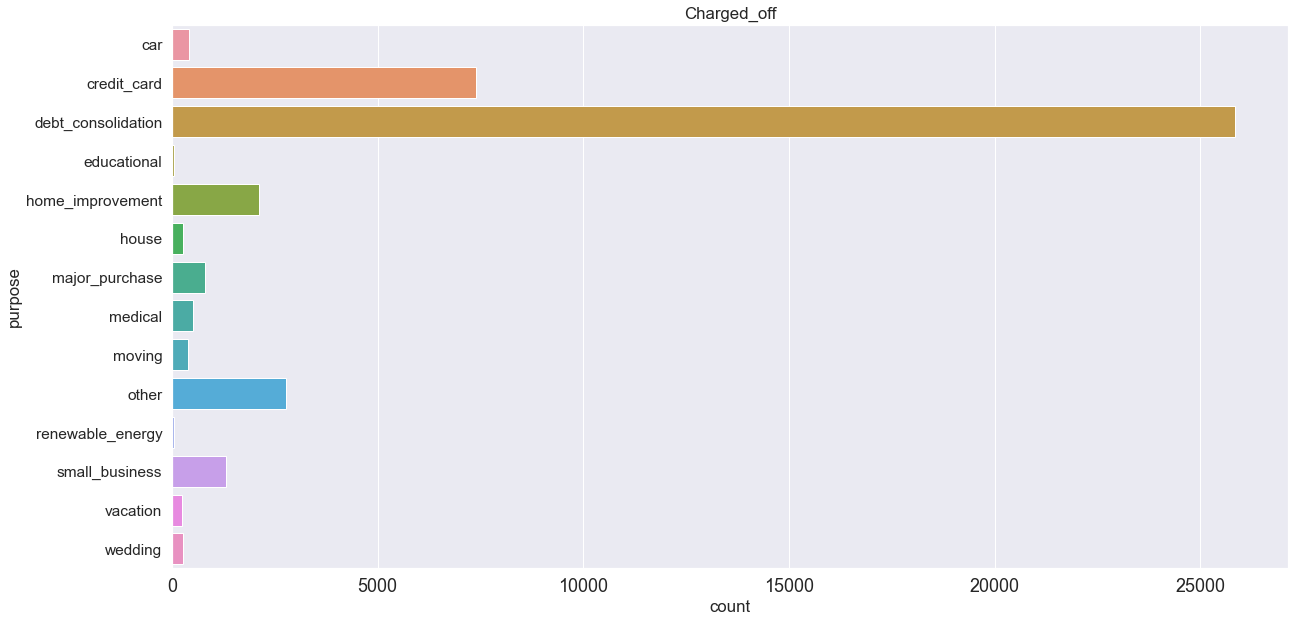

In [28]:
charged_off_purpose = charged_off.groupby(['purpose']).size().reset_index(name='count')
charged_off_purpose['percentage_(%)'] = (charged_off_purpose['count']/len(charged_off))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = charged_off_purpose)
plt.title('Charged_off')
plt.xticks(fontsize=18)
plt.show()

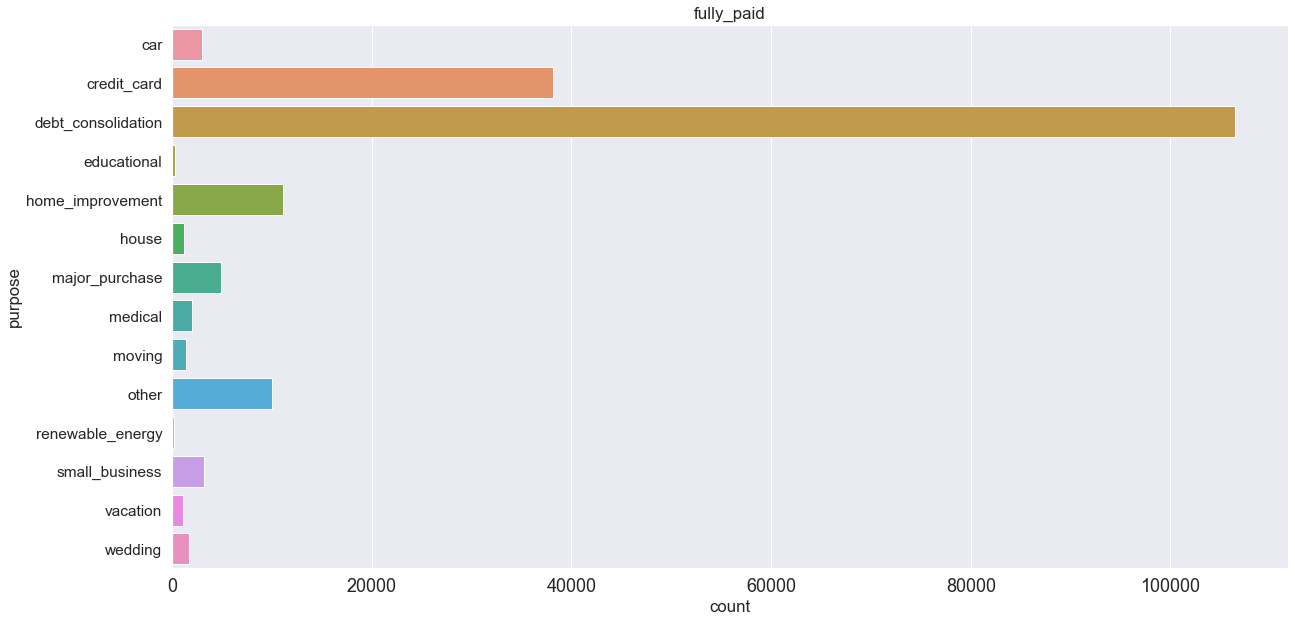

In [29]:
fully_paid_purpose = fully_paid.groupby(['purpose']).size().reset_index(name='count')
fully_paid_purpose['percentage_(%)'] = (fully_paid_purpose['count']/len(fully_paid))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = fully_paid_purpose)
plt.title('fully_paid')
plt.xticks(fontsize=18)
plt.show()

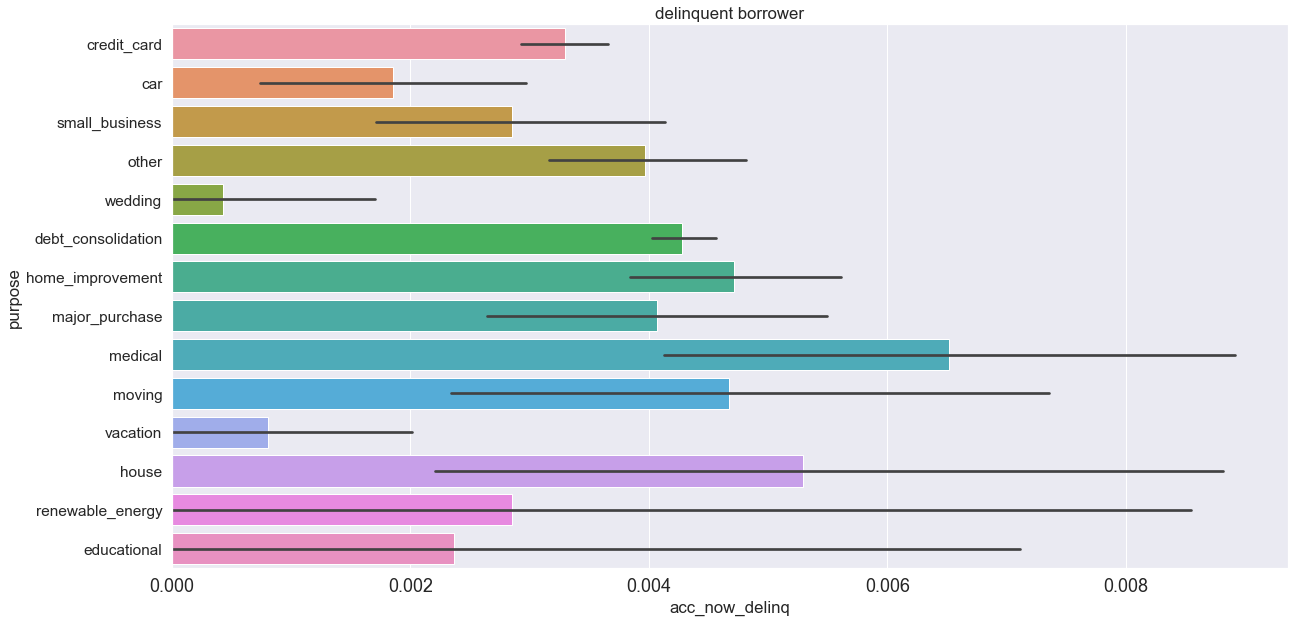

In [30]:
sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'acc_now_delinq', y = 'purpose', data = df)
plt.title('delinquent borrower')
plt.xticks(fontsize=18)
plt.show()

In [31]:
df = df.drop(['id'], axis = 1)

### Feature Engineering

In [32]:
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_day
289374,6000,6000,36 months,13.98,C,5 years,RENT,24000.0,Not Verified,Current,debt_consolidation,0.0,0.0,0.0,10.0,0.0,7056,42.5,10.0,f,3799.43,3799.43,3070.49000,2200.57,869.92,0.0,205.01,0.0,0.0,10125.0,16600.0,457.0
430647,4200,4200,36 months,13.65,C,< 1 year,RENT,20000.0,Not Verified,Current,debt_consolidation,0.0,0.0,0.0,10.0,0.0,3247,70.6,16.0,f,1838.77,1838.77,3142.48000,2361.23,781.25,0.0,142.84,0.0,0.0,34248.0,4600.0,671.0
123986,17000,17000,36 months,10.16,B,10+ years,MORTGAGE,76000.0,Verified,Fully Paid,credit_card,0.0,1.0,34.0,13.0,0.0,11262,35.2,35.0,f,0.00,0.00,18781.78946,17000.00,1781.79,0.0,11095.65,0.0,0.0,73911.0,31950.0,457.0
16495,30000,30000,36 months,11.11,B,2 years,MORTGAGE,129996.0,Verified,Fully Paid,home_improvement,0.0,0.0,0.0,6.0,0.0,14652,34.0,26.0,f,0.00,0.00,31802.07000,30000.00,1802.07,0.0,25915.08,0.0,0.0,0.0,0.0,244.0
91229,20125,20125,60 months,22.70,E,8 years,RENT,103000.0,Source Verified,Current,debt_consolidation,0.0,0.0,29.0,8.0,0.0,7490,62.9,19.0,f,14046.05,14046.05,14659.86000,6078.95,8580.91,0.0,592.06,0.0,0.0,145138.0,11900.0,852.0


In [33]:
df['total_rec_paid'] = df['total_rec_int'] - df['total_rec_late_fee']
df = df.drop(['total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'], axis = 1)
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_day,total_rec_paid
59337,35000,35000,60 months,17.10,C,9 years,MORTGAGE,85000.0,Verified,Fully Paid,credit_card,0.0,0.0,0.0,14.0,0.0,21691,51.5,19.0,f,0.00,0.00,43961.13114,27398.47,0.0,0.0,125406.0,42100.0,607.0,8961.13
323860,16625,16625,36 months,13.35,C,10+ years,OWN,38000.0,Not Verified,Current,debt_consolidation,0.0,0.0,75.0,8.0,0.0,14961,42.4,12.0,w,9593.68,9593.68,9570.49000,562.97,0.0,0.0,38645.0,35300.0,518.0,2539.17
114512,25000,25000,60 months,16.78,C,3 years,MORTGAGE,115000.0,Verified,Charged Off,debt_consolidation,0.0,1.0,0.0,10.0,0.0,20000,44.8,24.0,f,0.00,0.00,8188.82000,1267.66,0.0,0.0,211998.0,44600.0,274.0,2657.14
67991,5500,5500,36 months,15.61,C,5 years,RENT,19200.0,Not Verified,Charged Off,credit_card,0.0,2.0,0.0,6.0,0.0,8661,74.7,9.0,f,0.00,0.00,2526.42000,192.31,0.0,0.0,8661.0,11600.0,304.0,642.19
361437,12000,12000,60 months,16.29,D,6 years,RENT,42000.0,Source Verified,Charged Off,debt_consolidation,0.0,0.0,0.0,7.0,0.0,6566,81.1,12.0,w,0.00,0.00,2643.03000,293.67,0.0,0.0,24029.0,8100.0,273.0,1402.08


In [34]:
df.groupby(['payment_day','loan_status'])['payment_day'].mean()

payment_day  loan_status                                        
0.0          Charged Off                                               0.0
             Does not meet the credit policy. Status:Charged Off       0.0
             Fully Paid                                                0.0
28.0         Charged Off                                              28.0
             Does not meet the credit policy. Status:Charged Off      28.0
             Does not meet the credit policy. Status:Fully Paid       28.0
             Fully Paid                                               28.0
29.0         Charged Off                                              29.0
             Fully Paid                                               29.0
30.0         Charged Off                                              30.0
             Does not meet the credit policy. Status:Charged Off      30.0
             Does not meet the credit policy. Status:Fully Paid       30.0
             Fully Paid            

In [35]:
payment = []
for x in df['payment_day']:
    if x < 1:
        payment.append('0')
    elif x < 366:
        payment.append('28-365')
    elif x <731:
        payment.append('366-730')
    elif x <1401:
        payment.append('731-1400')
    else:
        payment.append('1400+')
        
df['payment_days'] = payment
df = df.drop(['payment_day'], axis = 1)
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_paid,payment_days
299630,20000,20000,60 months,20.99,E,4 years,MORTGAGE,110000.0,Verified,In Grace Period,home_improvement,1.0,0.0,22.0,7.0,0.0,3417,81.4,17.0,w,16868.13,16868.13,7690.96,550.00,0.0,0.0,332137.0,4200.0,4559.09,366-730
282278,6000,6000,36 months,15.61,D,< 1 year,MORTGAGE,60000.0,Verified,Current,other,0.0,2.0,0.0,9.0,1.0,5411,20.1,20.0,f,3833.41,3833.41,3133.84,209.79,0.0,0.0,228135.0,26900.0,967.25,366-730
288504,19700,19700,60 months,15.61,D,9 years,RENT,47000.0,Source Verified,Current,credit_card,0.0,0.0,33.0,7.0,0.0,25131,89.8,18.0,w,16102.68,16102.68,7107.92,475.00,0.0,0.0,50281.0,28000.0,3510.60,366-730
330251,4000,4000,36 months,20.20,E,3 years,RENT,25000.0,Not Verified,Current,other,0.0,1.0,0.0,6.0,0.0,7510,49.4,25.0,f,2406.63,2406.63,2534.19,149.07,0.0,0.0,9231.0,15200.0,940.82,366-730
98139,8000,8000,36 months,13.68,C,6 years,RENT,200000.0,Verified,Late (31-120 days),debt_consolidation,0.0,0.0,0.0,11.0,0.0,42096,85.8,19.0,f,2558.79,2558.79,7076.43,272.18,0.0,0.0,70965.0,47300.0,1635.22,731-1400


## Data Pre-Processing

In [36]:
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_paid,payment_days
137843,25000,25000,60 months,23.28,F,4 years,MORTGAGE,60000.0,Verified,Current,debt_consolidation,0.0,3.0,0.0,14.0,0.0,19277,38.3,22.0,f,15612.37,15612.37,21959.1700,708.79,0.0,0.0,150244.0,50300.0,12571.54,731-1400
309979,14400,14400,60 months,14.99,C,1 year,RENT,36000.0,Source Verified,Fully Paid,debt_consolidation,1.0,0.0,2.0,10.0,0.0,7217,28.6,27.0,w,0.00,0.00,16070.1500,7471.90,0.0,0.0,41353.0,25200.0,1670.15,28-365
120187,10000,10000,36 months,13.05,B,10+ years,OWN,46800.0,Source Verified,Fully Paid,debt_consolidation,0.0,0.0,0.0,7.0,0.0,9487,75.9,15.0,f,0.00,0.00,11892.3200,4137.02,0.0,0.0,9487.0,12500.0,1892.37,366-730
315162,10000,10000,36 months,13.98,C,9 years,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,0.0,1.0,28.0,10.0,1.0,3353,57.8,14.0,w,0.00,0.00,10341.5994,9658.24,0.0,0.0,42523.0,5800.0,341.60,28-365
328230,15000,15000,36 months,16.99,D,< 1 year,RENT,81000.0,Verified,Current,debt_consolidation,0.0,0.0,0.0,23.0,0.0,55227,96.7,37.0,w,8853.25,8853.25,9090.2400,534.72,0.0,0.0,167536.0,57100.0,2943.49,366-730


### Handling Outlier

In [37]:
from scipy import stats

In [38]:
z_scores = np.abs(stats.zscore(df['annual_inc']))
filtered_entries = (z_scores <3)
df = df[filtered_entries]

In [39]:
z_scores = np.abs(stats.zscore(df['revol_bal']))
filtered_entries = (z_scores <3)
df = df[filtered_entries]

In [40]:
z_scores = np.abs(stats.zscore(df['total_rec_paid']))
filtered_entries = (z_scores <3)
df = df[filtered_entries]

In [41]:
z_scores = np.abs(stats.zscore(df['total_rev_hi_lim']))
filtered_entries = (z_scores <3)
df = df[filtered_entries]

### Label Encoding

In [42]:
catg = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status',
        'purpose', 'initial_list_status','payment_days' ]

In [43]:
for col in df[catg]:
    print(f'value count from column {col} :')
    print(f'{df[col].value_counts()}')
    print('=='*50)

value count from column term :
 36 months    324791
 60 months    114034
Name: term, dtype: int64
value count from column grade :
B    131961
C    120717
D     72831
A     68892
E     31343
F     10577
G      2504
Name: grade, dtype: int64
value count from column emp_length :
10+ years    138197
< 1 year      54851
2 years       39379
3 years       34816
5 years       29143
1 year        28253
4 years       26633
6 years       24786
7 years       24765
8 years       21141
9 years       16861
Name: emp_length, dtype: int64
value count from column home_ownership :
MORTGAGE    216213
RENT        183257
OWN          39136
OTHER          173
NONE            45
ANY              1
Name: home_ownership, dtype: int64
value count from column verification_status :
Verified           151983
Not Verified       145319
Source Verified    141523
Name: verification_status, dtype: int64
value count from column loan_status :
Current                                                207893
Fully Paid        

In [44]:
df['grade'] = df['grade'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G'],[0,1,2,3,4,5,6])
df['emp_length'] = df['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years' ,'4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years'],[0,1,2,3,4,5,6,7,8,9,10])
df['verification_status'] = df['verification_status'].replace(['Verified', 'Source Verified','Not Verified'],[0,1,2])
df['initial_list_status'] = df['initial_list_status'].replace(['f', 'w'],[0,1])
df['payment_days'] = df['payment_days'].replace(['0','28-365', '366-730', '731-1400', '1400+' ],[0,1,2,3,4])
df['loan_status'] = df['loan_status'].replace(['Charged Off', 'Current', 'Default', 
                                               'Does not meet the credit policy. Status:Charged Off',
                                               'Does not meet the credit policy. Status:Fully Paid',
                                               'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],[0,1,2,3,4,5,6,7,8])


In [45]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['term']= label_encoder.fit_transform(df['term'])
  
df['term'].unique()

array([0, 1])

In [46]:
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_paid,payment_days
367636,35000,35000,0,13.98,2,10,MORTGAGE,125000.0,1,7,credit_card,2.0,0.0,14.0,19.0,0.0,35944,54.6,32.0,1,20277.28,20277.28,20329.96,1195.88,0.0,848.0,220393.0,65800.0,5607.24,2
356003,4800,4800,0,13.35,2,9,OWN,93000.0,2,1,debt_consolidation,0.0,1.0,65.0,6.0,1.0,1440,29.4,27.0,0,2638.02,2638.02,2925.90,162.55,0.0,0.0,264770.0,4900.0,763.92,2
273082,12600,12600,1,17.57,3,1,RENT,35000.0,1,1,credit_card,0.0,1.0,0.0,16.0,0.0,16322,59.8,22.0,1,10557.15,10557.15,4425.98,317.02,0.0,0.0,41766.0,27300.0,2383.13,2
445911,9925,9925,0,14.47,2,0,MORTGAGE,59000.0,0,5,other,0.0,0.0,25.0,8.0,1.0,1666,40.6,33.0,0,0.00,0.00,10799.43,335.59,0.0,0.0,241204.0,4100.0,874.44,2
180870,18000,18000,0,15.80,2,10,RENT,90000.0,0,0,debt_consolidation,0.0,1.0,40.0,14.0,0.0,13280,81.5,24.0,0,0.00,0.00,13896.47,631.06,0.0,0.0,123739.0,16300.0,3663.77,2


### One Hot Encoding

In [47]:
dummies1 = pd.get_dummies(df['home_ownership'],prefix='home')
dummies2 = pd.get_dummies(df['purpose'],prefix='purpose')

df = pd.concat([df,dummies1,dummies2],axis=1)

df = df.drop(['home_ownership','purpose','home_ANY', 'purpose_renewable_energy'],axis=1)

In [48]:
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_paid,payment_days,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
423016,16000,16000,1,18.92,3,10,49000.0,0,0,0.0,3.0,0.0,14.0,0.0,18272,59.7,34.0,0,0.00,0.00,6629.60,414.35,0.0,0.0,167100.0,30600.0,3707.86,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
95774,7550,7550,0,10.64,1,3,70000.0,1,1,0.0,0.0,0.0,3.0,0.0,755,3.3,15.0,0,1891.85,1891.85,6883.60,245.90,0.0,0.0,755.0,23200.0,1225.45,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
43180,17000,17000,0,6.62,0,5,203000.0,0,5,0.0,3.0,0.0,13.0,0.0,29253,44.8,30.0,0,0.00,0.00,18536.87,7053.53,0.0,0.0,453905.0,65300.0,1536.87,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200121,17000,17000,0,6.03,0,5,70000.0,2,5,0.0,3.0,0.0,7.0,0.0,2209,18.9,20.0,0,0.00,0.00,17405.59,15336.47,0.0,0.0,128111.0,11700.0,405.59,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
41450,7500,7500,0,13.17,3,6,105000.0,0,3,0.0,4.0,52.0,3.0,0.0,3607,44.0,19.0,0,0.00,0.00,2300.06,253.32,0.0,0.0,0.0,0.0,604.71,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Modeling

In [49]:
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import NearMiss
from catboost import CatBoostClassifier

from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import label_binarize

In [50]:
X = df.drop(['loan_status'], axis=1)
y = df[['loan_status']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
df.sample(5)

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,annual_inc,verification_status,loan_status,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_paid,payment_days,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
25928,7000,7000,0,14.72,2,3,65000.0,0,5,0.0,2.0,0.0,3.0,0.0,349,87.2,5.0,0,0.00,0.00,8698.60000,255.27,0.0,0.0,0.0,0.0,1698.60,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
47443,8400,8400,0,10.99,1,0,85000.0,0,1,0.0,0.0,74.0,19.0,0.0,5159,15.8,29.0,0,3112.79,3112.79,6597.02000,274.97,0.0,0.0,47178.0,32600.0,1309.81,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
439137,16375,16375,0,23.43,5,10,70000.0,2,5,0.0,1.0,25.0,8.0,0.0,8832,65.9,26.0,0,0.00,0.00,17910.33000,15360.13,0.0,0.0,149871.0,13400.0,1535.33,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
283877,35000,35000,0,14.49,2,6,91750.0,0,1,0.0,0.0,64.0,21.0,0.0,17174,57.2,35.0,0,22225.61,22225.61,17998.11000,1204.57,0.0,0.0,365121.0,30000.0,5223.72,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
58465,12000,12000,0,15.10,2,1,100000.0,2,5,2.0,1.0,11.0,14.0,0.0,12130,89.2,28.0,0,0.00,0.00,14017.97304,7769.60,0.0,0.0,102832.0,13600.0,2017.97,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [52]:
var = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
      'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'total_rec_paid']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[var] = scaler.fit_transform(X_train[var])
X_test[var] = scaler.transform(X_test[var])

In [54]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (351060, 45)
Shape of y_train (351060, 1)
Shape of X_test (87765, 45)
Shape of y_test (87765, 1)


### Decision Tree Classifier

In [55]:
# Fit classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# predict train set
y_pred_train1 = dtc.predict(X_train)

# predict test set
y_pred_test1 = dtc.predict(X_test)


# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((dtc.score(X_train, y_train) * 100), 2)
test_score_def = round((dtc.score(X_test, y_test) * 100), 2)

prec_score_train_def = round((precision_score(y_train, y_pred_train1, pos_label='positive', average='weighted')) * 100, 2)
prec_score_test_def = round((precision_score(y_test, y_pred_test1, pos_label='positive', average='weighted')) * 100, 2)

recall_score_train_def = round((recall_score(y_train, y_pred_train1, pos_label='positive', average='weighted')) * 100, 2)
recall_score_test_def = round((recall_score(y_test, y_pred_test1, pos_label='positive', average='weighted')) * 100, 2)

f1_train_def = round(f1_score(y_train, y_pred_train1, pos_label='positive', average='weighted')*100, 2)
f1_test_def = round(f1_score(y_test, y_pred_test1, pos_label='positive', average='weighted')*100, 2)


print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Train : {}%'.format(precision_score))
print('Precision Test : {}%'.format(prec_score_test_def))
print('Recall Train : {}%'.format(recall_score_train_def))
print('Recall Test : {}%'.format(recall_score))
print('F1 Score Train : {}%'.format(f1_train_def))
print('F1 Score Test : {}%'.format(f1_test_def))

Training Accuracy : 100.0%
Test Accuracy : 94.29%
Precision Train : <function precision_score at 0x0000029B52EA7B80>%
Precision Test : 94.78%
Recall Train : 100.0%
Recall Test : <function recall_score at 0x0000029B52EA7C10>%
F1 Score Train : 100.0%
F1 Score Test : 94.53%


In [56]:
labels = [0, 1, 2, 3]

# Binarize ytest with shape (n_samples, n_classes)
y_test_roc1 = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
y_pred_roc1 = label_binarize(y_pred_test1, classes=labels)

print("ROC-AUC Score (Test Set): %.2f" % roc_auc_score(y_test_roc1, y_pred_roc1, average='macro', multi_class='ovo'))

ROC-AUC Score (Test Set): 0.80


In [57]:
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test1, average='macro'))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test1, average='macro'))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test1, average='macro'))

Recall (Test Set): 0.49
Precision (Test Set): 0.49
F1-Score (Test Set): 0.49


#### Random Forest Classifier

In [58]:
# Fit classifier
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf.fit(X_train, y_train)

# predict train set
y_pred_train2 = rf.predict(X_train)

# predict test set
y_pred_test2 = rf.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((rf.score(X_train, y_train) * 100), 2)
test_score_def = round((rf.score(X_test, y_test) * 100), 2)

prec_score_train_def = round((precision_score(y_train, y_pred_train2, pos_label='positive', average='weighted')) * 100, 2)
prec_score_test_def = round((precision_score(y_test, y_pred_test2, pos_label='positive', average='weighted')) * 100, 2)

recall_score_train_def = round((recall_score(y_train, y_pred_train2, pos_label='positive', average='weighted')) * 100, 2)
recall_score_test_def = round((recall_score(y_test, y_pred_test2, pos_label='positive', average='weighted')) * 100, 2)

f1_train_def = round(f1_score(y_train, y_pred_train2, pos_label='positive', average='weighted')*100, 2)
f1_test_def = round(f1_score(y_test, y_pred_test2, pos_label='positive', average='weighted')*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Train : {}%'.format(prec_score_train_def))
print('Precision Test : {}%'.format(prec_score_test_def))
print('Recall Train : {}%'.format(recall_score_train_def))
print('Recall Test : {}%'.format(recall_score_test_def))
print('F1 Score Train : {}%'.format(f1_train_def))
print('F1 Score Test : {}%'.format(f1_test_def))

Training Accuracy : 100.0%
Test Accuracy : 96.56%
Precision Train : 100.0%
Precision Test : 95.1%
Recall Train : 100.0%
Recall Test : 96.56%
F1 Score Train : 100.0%
F1 Score Test : 95.46%


In [59]:
labels = [0, 1, 2, 3]

# Binarize ytest with shape (n_samples, n_classes)
y_test_roc2 = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
y_pred_roc2 = label_binarize(y_pred_test2, classes=labels)

print("ROC-AUC Score (Test Set): %.2f" % roc_auc_score(y_test_roc2, y_pred_roc2, average='macro', multi_class='ovo'))

ROC-AUC Score (Test Set): 0.79


In [60]:
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test2, average='macro'))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test2, average='macro'))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test2, average='macro'))

Recall (Test Set): 0.46
Precision (Test Set): 0.59
F1-Score (Test Set): 0.49


#### XGBoost Classifier

In [61]:
# Fit classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# predict train set
y_pred_train_3 = xgb.predict(X_train)

# predict test set
y_pred_test_3 = xgb.predict(X_test)


# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)

prec_score_train_def = round((precision_score(y_train, y_pred_train_3, pos_label='positive', average='weighted')) * 100, 2)
prec_score_test_def = round((precision_score(y_test, y_pred_test_3, pos_label='positive', average='weighted')) * 100, 2)

recall_score_train_def = round((recall_score(y_train, y_pred_train_3, pos_label='positive', average='weighted')) * 100, 2)
recall_score_test_def = round((recall_score(y_test, y_pred_test_3, pos_label='positive', average='weighted')) * 100, 2)

f1_train_def = round(f1_score(y_train, y_pred_train_3, pos_label='positive', average='weighted')*100, 2)
f1_test_def = round(f1_score(y_test, y_pred_test_3, pos_label='positive', average='weighted')*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Train : {}%'.format(prec_score_train_def))
print('Precision Test : {}%'.format(prec_score_test_def))
print('Recall Train : {}%'.format(recall_score_train_def))
print('Recall Test : {}%'.format(recall_score_test_def))
print('F1 Score Train : {}%'.format(f1_train_def))
print('F1 Score Test : {}%'.format(f1_test_def))

Training Accuracy : 97.78%
Test Accuracy : 97.22%
Precision Train : 97.76%
Precision Test : 95.8%
Recall Train : 97.78%
Recall Test : 97.22%
F1 Score Train : 97.04%
F1 Score Test : 96.29%


ROC-AUC Score (Test Set): 0.82


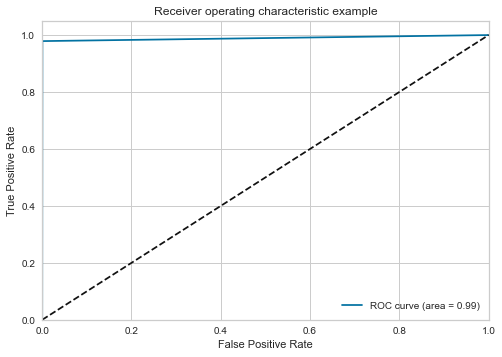

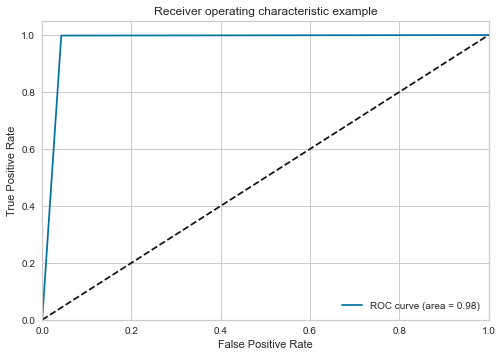

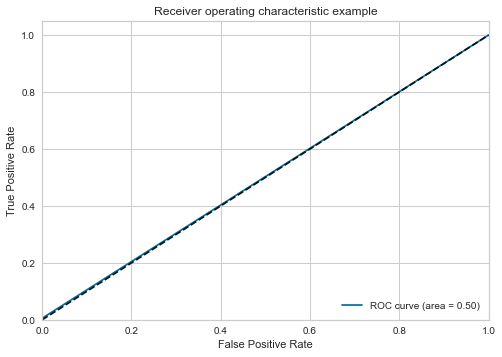

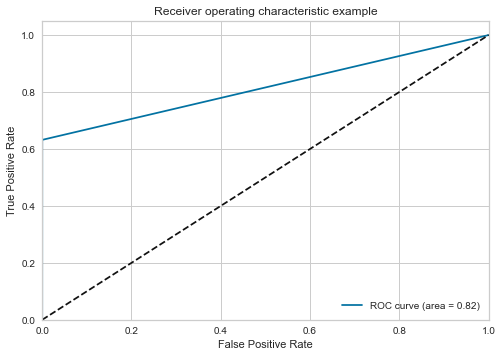

In [86]:
from sklearn.metrics import roc_curve, auc

labels = [0, 1, 2, 3]
n_classes = 4

# Binarize ytest with shape (n_samples, n_classes)
y_test_roc3 = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
y_pred_roc3 = label_binarize(y_pred_test_3, classes=labels)

print("ROC-AUC Score (Test Set): %.2f" % roc_auc_score(y_test_roc3, y_pred_roc3, average='macro', multi_class='ovo'))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc3[:, i], y_pred_roc3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [63]:
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test_3, average='macro'))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test_3, average='macro'))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test_3, average='macro'))

Recall (Test Set): 0.51
Precision (Test Set): 0.60
F1-Score (Test Set): 0.53


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8198
           1       0.95      1.00      0.98     41703
           2       0.08      0.01      0.01       175
           3       0.92      0.63      0.75       144
           4       0.83      0.82      0.82       330
           5       0.99      1.00      1.00     35142
           6       0.00      0.00      0.00       589
           7       0.00      0.00      0.00       239
           8       0.62      0.16      0.26      1245

    accuracy                           0.97     87765
   macro avg       0.60      0.51      0.53     87765
weighted avg       0.96      0.97      0.96     87765



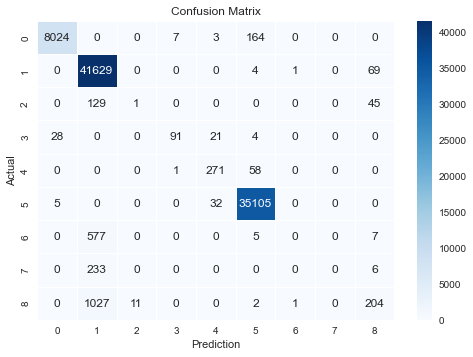

In [64]:
# Confusion Matrix Test
cnf_matrix = confusion_matrix(y_test, y_pred_test_3)
print(classification_report(y_test, y_pred_test_3))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [65]:
#Feature Importance with Dalex

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

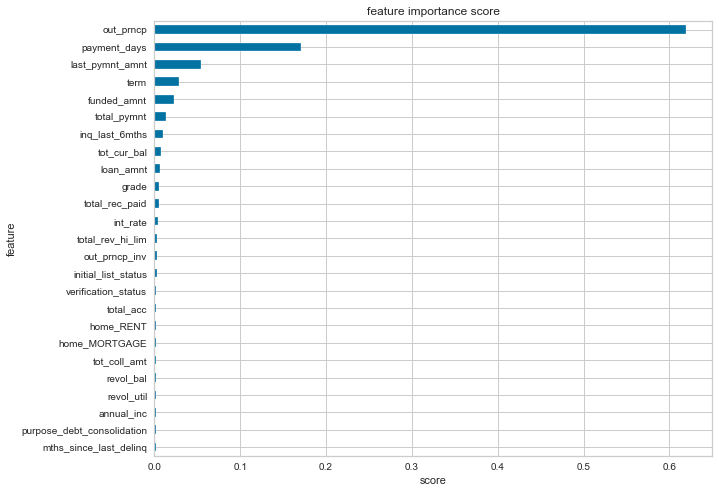

In [66]:
show_feature_importance(xgb)